In [37]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [136]:
# 读取csv
df_BAU24 = pd.read_csv(r'D:\DR\T6\100DR数据\T6BAU\T6BAU24Meter.csv', usecols=[10])
df_DRmax = pd.read_csv(r'D:\DR\T6\100DR数据\T6DR100\T6DR100Meter.csv', usecols=[10])

# 设定时间索引
udt = np.datetime64('2022-06-01 01:00:00', 'h')
timelist = udt + np.arange(1704)
df_BAU24.index = timelist
df_DRmax.index = timelist

# 单位转换、去掉0值
df_BAU24 = pd.DataFrame(df_BAU24[df_BAU24 > 1]).dropna()  / 1000000 / 3600
df_DRmax = pd.DataFrame(df_DRmax[df_DRmax > 1]).dropna()  / 1000000 / 3600
df_BAU24.columns = ['BAU24']
df_DRmax.columns = ['DRmax']

df = pd.concat([df_BAU24, df_DRmax], axis=1)

In [144]:
df
by_day = df.resample('D').sum()

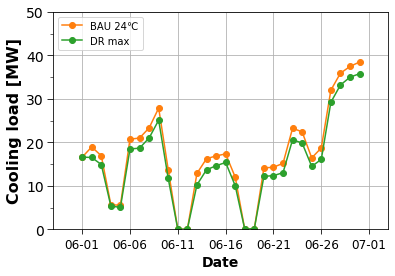

In [148]:
# 画出6、7月逐日负荷的折线图
fig, ax = plt.subplots()

ax.plot(by_day[by_day.index.month==6].iloc[:, 0], marker= 'o', color = 'C1')
ax.plot(by_day[by_day.index.month==6].iloc[:, 1], marker= 'o', color = 'C2')

ax.set_xlabel('Date', size = 14, weight = 'heavy')
ax.set_ylabel('Cooling load [MW]', size = 16, weight = 'heavy')

ax.set_xlim(pd.Timestamp('2022-05-29'), pd.Timestamp('2022-07-03'))
ax.set_ylim(0,50)

ax.set_xticks(pd.date_range('2022-06-01', '2022-07-01', freq = '5d'))
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d'))
ax.set_yticks(np.linspace(0,50,6))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

ax.tick_params(axis = 'x', which = 'major',  size = 5, labelsize = 12)
ax.tick_params(axis = 'y', which = 'major', size = 6, labelsize = 14)
ax.tick_params(axis = 'y', which = 'minor', size = 3)

ax.xaxis.grid(True, which='major')
ax.yaxis.grid(True, which='major')
ax.legend(['BAU 24℃', 'DR max'], loc = 'upper left')

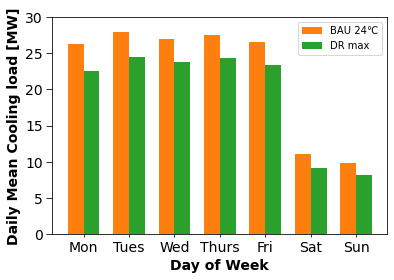

In [210]:
by_weekday = by_day.groupby(by_day.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

idx = np.arange(7)
bar_width = 0.35

fig, ax = plt.subplots()

plt.bar(idx - 0.5*bar_width, by_weekday.iloc[:, 0], bar_width, color = 'C1', label = 'BAU 24℃')
plt.bar(idx + 0.5*bar_width, by_weekday.iloc[:, 1], bar_width, color = 'C2', label = 'DR max')

plt.xlabel('Day of Week', size = 14, weight = 'heavy')
plt.ylabel('Daily Mean Cooling load [MW]', size = 14, weight = 'heavy')

# ax.set_xticklabels(by_weekday.index)
plt.xticks(idx, by_weekday.index)

plt.ylim(0,30)
plt.yticks(np.linspace(0,30,7))
# ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

ax.tick_params(axis = 'x', which = 'major',  size = 3, labelsize = 14)
ax.tick_params(axis = 'y', which = 'major', size = 6, labelsize = 14)
ax.tick_params(axis = 'y', which = 'minor', size = 3)

plt.legend()

2022-07-07 08:00:00    482.530921
2022-07-07 09:00:00    422.310368
2022-07-07 10:00:00    441.955438
2022-07-07 11:00:00    463.833742
2022-07-07 12:00:00    477.222630
2022-07-07 13:00:00    484.081293
2022-07-07 14:00:00    505.157779
2022-07-07 15:00:00    503.627111
2022-07-07 16:00:00    502.512685
2022-07-07 17:00:00    518.106803
2022-07-07 18:00:00    515.362563
2022-07-07 19:00:00    445.068487
2022-07-07 20:00:00    323.575193
2022-07-07 21:00:00    263.016876
Name: 24, dtype: float64


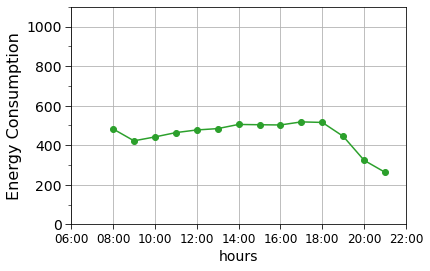

In [35]:
df_day = df7[df7.index.day == 7].iloc[:,0] # 以7月7日为例
print(df_day)
fig, ax = plt.subplots()

ax.plot(df_day, marker= 'o', color = 'C2', linewidth = 1.5)

ax.set_xlabel('hours', size = 14)
ax.set_ylabel('Energy Consumption', size = 16)

ax.set_ylim(0,1100) # 设置Y轴刻度
ax.set_yticks(np.linspace(0,1000,6))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(100))

hour =  mpl.dates.HourLocator(interval=2) #主刻度为小时，间隔为2h
ax.xaxis.set_major_locator(hour)

ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%M')) # 设置时间格式
ax.set_xlim(np.datetime64('2022-07-07 06:00:00','h'),np.datetime64('2022-07-07 22:00:00','h')) # 设置坐标范围

ax.tick_params(axis = 'x', which = 'major',  size = 5, labelsize = 12)
ax.tick_params(axis = 'y', which = 'major', size = 6, labelsize = 14)
ax.tick_params(axis = 'y', which = 'minor', size = 3)

ax.xaxis.grid(True, which='major')
ax.yaxis.grid(True, which='major')